# KNN, SVM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

Use the following cell to generate a first data set (an `X` `Y` pair)

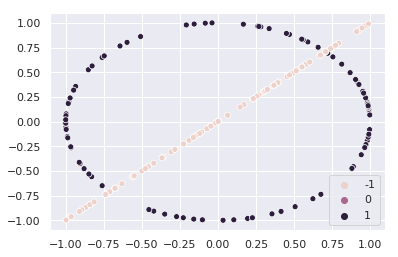

In [14]:
circle_points = np.asarray([[np.cos(theta), np.sin(theta)] for theta in np.random.uniform(0,2 * np.pi, size=100)])
line_points = np.asarray([[x,x] for x in np.random.uniform(-1,1,size=100)])

X = np.concatenate([circle_points, line_points])
Y = np.concatenate([[1] * 100, [-1] * 100])

points_to_try = np.asarray([[x,y] for x in np.arange(-1,1,0.01) for y in np.arange(-1,1,0.01)])

sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

Here's another set of generated data on which these models work a bit better.

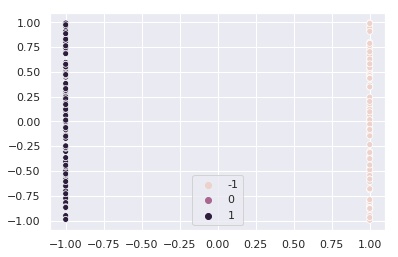

In [4]:
line_1 = np.asarray([[-1,coord] for coord in np.random.uniform(-1,1,size=100)])
line_2 = np.asarray([[1,coord] for coord in np.random.uniform(-1,1,size=100)])

X = np.concatenate([line_1, line_2])
Y = np.concatenate([[1] * 100, [-1] * 100])

points_to_try = np.asarray([[x,y] for x in np.arange(-1,1,0.01) for y in np.arange(-1,1,0.01)])

sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

# $k$-Nearest Neighbor

KNN is a supervised learning algorithm which may be used for classification or for regression.

## Advantages  

  - No training time
  - Flexible
  - Simple and interpretable
  - One hyper-parameter (two if you count distance metric)
  
## Disadvantages

  - Slow if you have lots of training data
  - Needs homogeneous features (aka normalize features first)
  - Choosing that one hyper-parameter is hard.
  - Doesn't work well with imbalanced data
  - Sensitive to outliers
  - Cannot deal with missing values
  - Susceptible to the curse of dimensionality
  
## Algorithm

  1. Choose number of neighbors $k$
  1. Calculate distance from `new_point` to each point in `data_set`.
  1. Order based on distance, and choose $k$ closest points.
  1. Aggregate using `mean` (regression) or `mode` (classification).

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5).fit(X,Y)

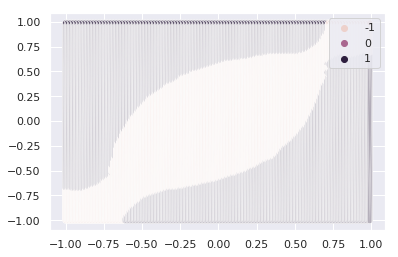

In [16]:
knn_predictions = knn_classifier.predict(points_to_try)

sns.scatterplot(x=points_to_try[:,0], y=points_to_try[:,1], hue=knn_predictions)

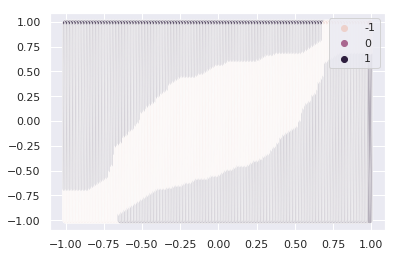

In [17]:
manhattan_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan').fit(X,Y)
manhattan_predictions = manhattan_classifier.predict(points_to_try)

sns.scatterplot(x=points_to_try[:,0], y=points_to_try[:,1], hue=manhattan_predictions)

# Support Vector Machines

In [8]:
from sklearn import svm

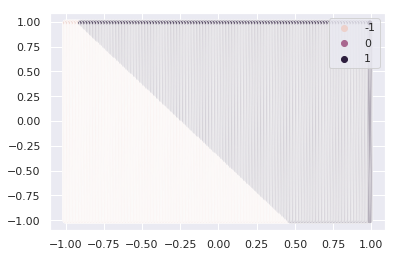

In [18]:
svm_classifier_nk = svm.SVC(kernel='linear').fit(X,Y)
svm_preds_nk = svm_classifier_nk.predict(points_to_try)

sns.scatterplot(x=points_to_try[:,0], y=points_to_try[:,1], hue=svm_preds_nk)

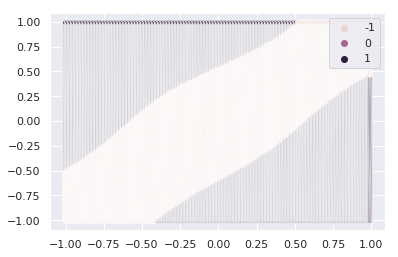

In [19]:
svm_classifier = svm.SVC(gamma='scale', kernel='rbf').fit(X,Y)
svm_preds = svm_classifier.predict(points_to_try)

sns.scatterplot(x=points_to_try[:,0], y=points_to_try[:,1], hue=svm_preds)

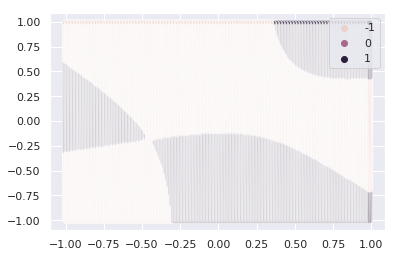

In [20]:
sig_kernel = svm.SVC(gamma='scale', kernel='sigmoid').fit(X,Y)
sig_preds = sig_kernel.predict(points_to_try)

sns.scatterplot(x=points_to_try[:,0], y=points_to_try[:,1], hue=sig_preds)

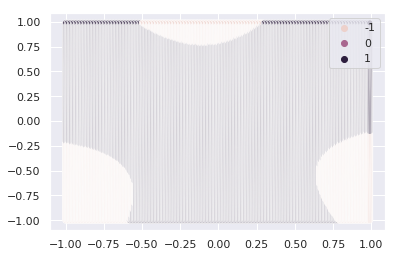

In [21]:
poly_kernel = svm.SVC(gamma='scale', kernel='poly').fit(X,Y)
poly_preds = poly_kernel.predict(points_to_try)

sns.scatterplot(x=points_to_try[:,0], y=points_to_try[:,1], hue=poly_preds)